## Group Work With the SmB6 data

### This morning it's time to try some of the things you've been exposed to over the last two days. Split into groups of two or three.  If you're daring, try switching tables and working with someone new!  Although you'll work in pairs, each of you should creat your own notebook and experiment as you go.  



In [1]:
#Read in the Excel Spreadsheet

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


PR_file_path = 'nsf_2d_workshop_2018/SmB6_data/PRX_Publication/Figure_2a_b.xlsx'

PR_excel = pd.ExcelFile(PR_file_path)

print(PR_excel.sheet_names)

['Pub-1-"SmB6"-Figure-1a', 'Pub-1-"SmB6-Al"-Figure-1a', 'Pub-1-"SmB6-C"-Figure-1b']


In [1]:
!pwd

/home/idies/workspace/Storage/ncarey/persistent/NSF_Workshop


In [82]:
#load the sheet for fig 1 into a pandas data frame

Fig1_df = PR_excel.parse(PR_excel.sheet_names[0])

Fig1_df

,T,1/T,R,R/R300K,ln(R/R300K)
0,K,1/K,Ohm,NaN,NaN
1,Growth 2_Pure SmB6,Growth 2_Pure SmB6,Growth 2_Pure SmB6,Growth 2_Pure SmB6,Growth 2_Pure SmB6
2,NaN,NaN,NaN,NaN,NaN
3,299.998,0.00333,0.000803224,1,-1.11022e-16
4,299.022,0.00334,0.000802679,0.99932,-0.00067869
5,297.591,0.00336,0.000801262,0.99756,-0.00245
6,296.667,0.00337,0.000802865,0.99955,-0.000447885
7,295.63,0.00338,0.00080245,0.99904,-0.000963891
8,294.495,0.0034,0.000803889,1.00083,0.000827388
9,293.299,0.00341,0.000801993,0.99847,-0.00153


In [91]:
Fig1_df.columns

Index(['T', '1/T', 'R', 'R/R300K', 'ln(R/R300K)'], dtype='object')

In [108]:
def mask(df, key, value):
    return df[df[key] != value]

pd.DataFrame.mask = mask

trimmed = Fig1_df.drop([0,1,2])

for column in trimmed.columns:
    trimmed = trimmed.mask(column, '--')
    
trimmed

,T,1/T,R,R/R300K,ln(R/R300K)
3,299.998,0.00333,0.000803224,1,-1.11022e-16
4,299.022,0.00334,0.000802679,0.99932,-0.00067869
5,297.591,0.00336,0.000801262,0.99756,-0.00245
6,296.667,0.00337,0.000802865,0.99955,-0.000447885
7,295.63,0.00338,0.00080245,0.99904,-0.000963891
8,294.495,0.0034,0.000803889,1.00083,0.000827388
9,293.299,0.00341,0.000801993,0.99847,-0.00153
10,291.57,0.00343,0.000803965,1.00092,0.000922308
11,290.71,0.00344,0.000804815,1.00198,0.00198
12,289.627,0.00345,0.000805677,1.00305,0.00305


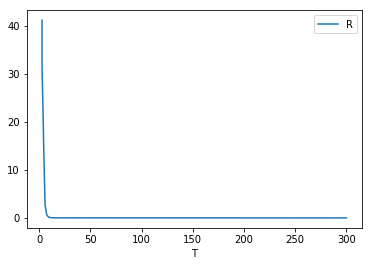

In [109]:
trimmed.plot(x=trimmed.columns[0], y=trimmed.columns[2])

(1, 80)

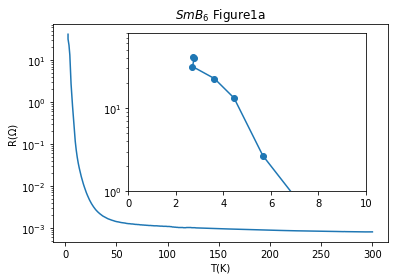

In [168]:
#Pandas' Dataframe wrapper for Matplotlib - slightly difference syntax
ax1 = trimmed.plot(x=trimmed.columns[0], y=trimmed.columns[2], title=r'$SmB_6$' + ' Figure1a', logy=True, legend=False)

#Regular Matplotlib code
fig = ax1.get_figure()

y_label = 'R({0})'.format(chr(937)) #chr(937) is a character code for greek letter omega
x_label = 'T(K)'
ax1.set_ylabel(y_label)
ax1.set_xlabel(x_label)

# Code for inset plot
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.3, 0.3, 0.55, 0.55]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(trimmed['T'], trimmed['R'], marker='o', markersize=6)
ax2.set_yscale('log')
ax2.set_xlim(left=0, right=10)
ax2.set_ylim(bottom=1, top=80)



In [161]:
#save plot
fig.savefig('Fig1a.png')